In [79]:
import tensorflow as tf

In [80]:
import pandas as pd

In [81]:
test_data = pd.read_csv('F:\\NIKITA\\Handwritten digit recognition\\test.csv')
train_data = pd. read_csv("F:\\NIKITA\\Handwritten digit recognition\\train.csv")

In [90]:
y_train = train_data["label"]
x_train = train_data.drop(labels=["label"], axis=1)

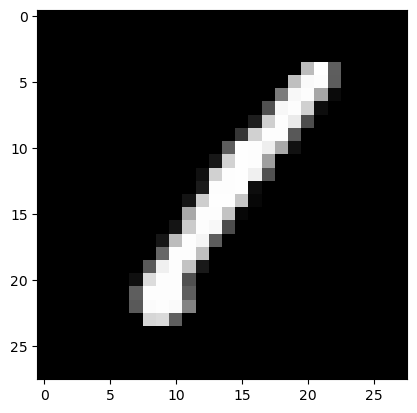

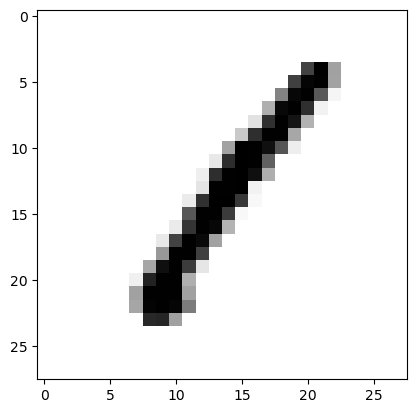

In [100]:
import matplotlib.pyplot as plt

plt.imshow(x_train.iloc[0].values.reshape(28, 28), cmap='gray')
plt.show()

plt.imshow(x_train.iloc[0].values.reshape(28, 28), cmap='binary')
plt.show()

In [101]:
print(x_train.iloc[0])

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 0, Length: 784, dtype: int64


After Normalization

In [107]:
print(y_train.iloc[0])

1


In [108]:
import numpy as np
IMG_SIZE = 28
x_train1 = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_test1 = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)    
print('Training sample dimensions ',x_train1.shape)
print('Testing sample dimensions ',x_test1.shape)

Training sample dimensions  (42000, 28, 28, 1)
Testing sample dimensions  (10000, 28, 28, 1)


In [109]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [110]:
model = Sequential()

model.add(Conv2D(64, (3,3), input_shape = x_train1.shape[1: ]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(32))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

In [111]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 activation_6 (Activation)   (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_7 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

In [112]:
print(x_train1.shape, y_train.shape)

(42000, 28, 28, 1) (42000,)


In [113]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [114]:
model.fit(x_train1, y_train, epochs=5, validation_split = 0.3)

Epoch 1/5
919/919 [==============================] - 24s 25ms/step - loss: 0.4855 - accuracy: 0.8434 - val_loss: 0.1775 - val_accuracy: 0.9452
Epoch 2/5
919/919 [==============================] - 29s 32ms/step - loss: 0.1464 - accuracy: 0.9555 - val_loss: 0.1206 - val_accuracy: 0.9617
Epoch 3/5
919/919 [==============================] - 26s 29ms/step - loss: 0.1091 - accuracy: 0.9658 - val_loss: 0.0968 - val_accuracy: 0.9687
Epoch 4/5
919/919 [==============================] - 26s 29ms/step - loss: 0.0867 - accuracy: 0.9736 - val_loss: 0.0847 - val_accuracy: 0.9735
Epoch 5/5
919/919 [==============================] - 27s 29ms/step - loss: 0.0744 - accuracy: 0.9773 - val_loss: 0.0858 - val_accuracy: 0.9740


In [122]:
predictions = model.predict([x_test1])

313/313 [==============================] - 2s 6ms/step


In [123]:
print(predictions)

[[0.00000000e+00 2.06477778e-35 3.16786652e-20 ... 1.00000000e+00
  2.41897343e-29 1.93762922e-29]
 [1.16312203e-15 1.07279814e-23 1.00000000e+00 ... 1.20124743e-31
  6.53041464e-19 1.96647451e-31]
 [3.86564240e-21 1.00000000e+00 2.82351174e-18 ... 2.90255067e-15
  2.68339535e-16 9.07610825e-17]
 ...
 [6.43411615e-22 1.19400415e-27 3.38435487e-20 ... 1.51050963e-26
  1.77775749e-13 8.30410559e-20]
 [5.04926716e-16 3.92691754e-38 3.52236854e-35 ... 4.08076954e-20
  2.80023256e-20 6.33363326e-24]
 [2.14477077e-05 3.70924056e-29 4.07518197e-09 ... 2.97472730e-26
  1.16470918e-14 3.92282734e-12]]


In [124]:
print(np.argmax(predictions[0]))

7


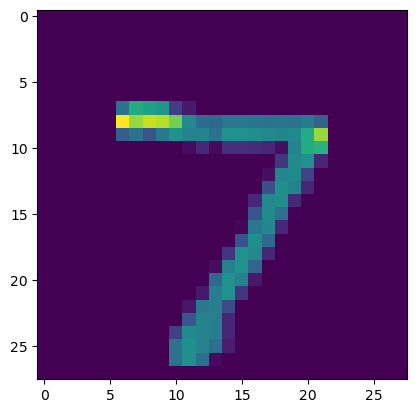

In [125]:
plt.imshow(x_test[0])

In [128]:
print(np.argmax(predictions[120]))

5


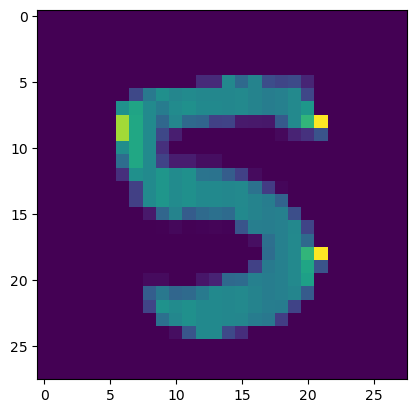

In [129]:
plt.imshow(x_test[120])

In [130]:
import cv2

In [131]:
img = cv2.imread('8.png')

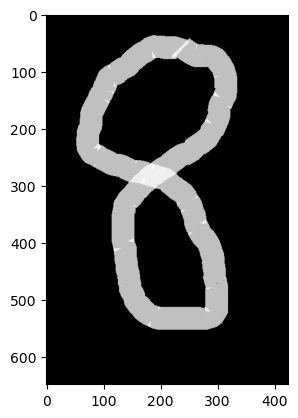

In [132]:
plt.imshow(img)

In [133]:
img.shape

(648, 424, 3)

In [134]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [135]:
gray.shape

(648, 424)

In [136]:
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)

In [137]:
resized.shape

(28, 28)

In [138]:
newimg = tf.keras.utils.normalize (resized, axis=1)

In [139]:
newimg =  np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [140]:
newimg.shape

(1, 28, 28, 1)

In [143]:
predictions = model.predict(newimg)

1/1 [==============================] - 0s 27ms/step


In [144]:
print(np.argmax(predictions))

8


In [147]:
model.save("Model.h5")